<a href="https://colab.research.google.com/github/taliahtarik/Homework1/blob/main/day1_hospital_readmissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import seaborn as sns
uploaded = files.upload()


Saving FY_2024_Hospital_Readmissions_Reduction_Program_Hospital.csv to FY_2024_Hospital_Readmissions_Reduction_Program_Hospital (1).csv


In [ ]:
file = "FY_2024_Hospital_Readmissions_Reduction_Program_Hospital.csv"
data = pd.read_csv(file)
data.head()

Facility Name  Facility ID State            Measure Name  \
0  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL  READM-30-HIP-KNEE-HRRP   
1  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL        READM-30-HF-HRRP   
2  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL       READM-30-AMI-HRRP   
3  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL        READM-30-PN-HRRP   
4  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL      READM-30-CABG-HRRP   

   Number of Discharges  Footnote  Excess Readmission Ratio  \
0                   NaN       NaN                    0.8916   
1                 616.0       NaN                    1.1003   
2                 274.0       NaN                    0.9332   
3                 404.0       NaN                    0.9871   
4                 126.0       NaN                    0.9517   

   Predicted Readmission Rate  Expected Readmission Rate  \
0                      3.5325                     3.9618   
1                     23.1263                    21.0184   
2                     12.9044                    13.8283   
3                     17.0529                    17.2762   
4                      9.8131                    10.3112   

  Number of Readmissions  Start Date    End Date  
0      Too Few to Report  07/01/2019  06/30/2022  
1                    149  07/01/2019  06/30/2022  
2                     32  07/01/2019  06/30/2022  
3                     68  07/01/2019  06/30/2022  
4                     11  07/01/2019  06/30/2022

In [ ]:
data['Number of Discharges'].fillna(data['Number of Discharges'].median(), inplace=True)

<ipython-input-3-5eff756c1ad0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Number of Discharges'].fillna(data['Number of Discharges'].median(), inplace=True)


In [ ]:
data['Number of Readmissions'] = pd.to_numeric(data['Number of Readmissions'], errors='coerce')
readmissions_by_diagnosis = data.groupby('Measure Name')['Number of Readmissions'].sum()
readmissions_by_diagnosis_sorted = readmissions_by_diagnosis.sort_values(ascending=False)
top_5_diagnoses = readmissions_by_diagnosis_sorted.head(5)
for diagnosis, readmissions in top_5_diagnoses.items():
    print(f"{diagnosis}: {int(readmissions):,} readmissions.")


READM-30-HF-HRRP: 148,213 readmissions.
READM-30-PN-HRRP: 101,169 readmissions.
READM-30-COPD-HRRP: 39,275 readmissions.
READM-30-AMI-HRRP: 33,269 readmissions.
READM-30-HIP-KNEE-HRRP: 6,721 readmissions.


reads Heart Failure, Pneuomnia, Chronic Obstructive Pulmonary Disease Care, Heart Attack Care, and Total Hip/Knee Arthroplasty

research questions: How do the excess readmission ratio and the predicted readmission rate influence the actual number of readmissions across healthcare facilities in various states?

How can the excess readmission ratio and predicted readmission rate be used as indicators of the actual number of readmissions across healthcare facilities in different states?



In [ ]:
data.describe()
data[['Excess Readmission Ratio', 'Predicted Readmission Rate', 'Number of Readmissions']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18774 entries, 0 to 18773
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Excess Readmission Ratio    12077 non-null  float64
 1   Predicted Readmission Rate  12077 non-null  float64
 2   Number of Readmissions      7890 non-null   float64
dtypes: float64(3)
memory usage: 440.1 KB


<Axes: >

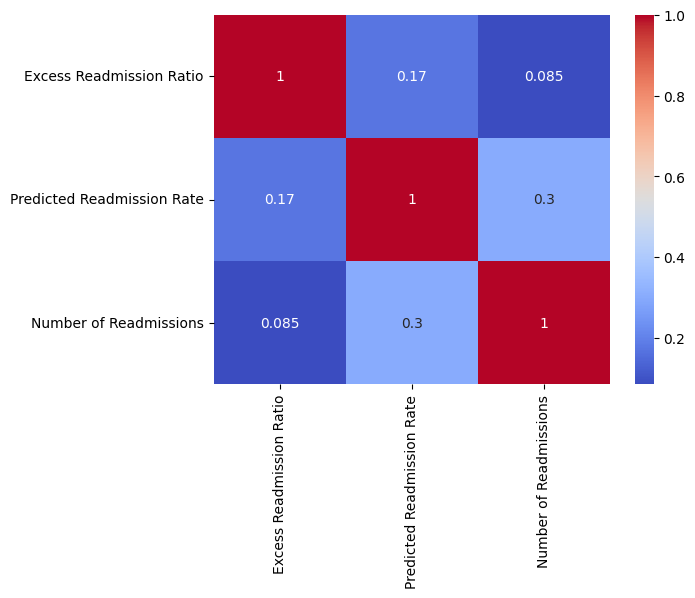

In [ ]:
correlation_matrix = data[['Excess Readmission Ratio', 'Predicted Readmission Rate', 'Number of Readmissions']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [ ]:
state_to_region = {
    'Alabama': 'Southeast', 'Alaska': 'West', 'Arizona': 'Southwest', 'Arkansas': 'Southeast',
    'California': 'West', 'Colorado': 'West', 'Connecticut': 'Northeast', 'Delaware': 'Northeast',
    'Florida': 'Southeast', 'Georgia': 'Southeast', 'Hawaii': 'West', 'Idaho': 'West',
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest',
    'Kentucky': 'Southeast', 'Louisiana': 'Southwest', 'Maine': 'Northeast', 'Maryland': 'Northeast',
    'Massachusetts': 'Northeast', 'Michigan': 'Midwest', 'Minnesota': 'Midwest', 'Mississippi': 'Southeast',
    'Missouri': 'Midwest', 'Montana': 'West', 'Nebraska': 'Midwest', 'Nevada': 'West',
    'New Hampshire': 'Northeast', 'New Jersey': 'Northeast', 'New Mexico': 'Southwest',
    'New York': 'Northeast', 'North Carolina': 'Southeast', 'North Dakota': 'Midwest',
    'Ohio': 'Midwest', 'Oklahoma': 'Southwest', 'Oregon': 'West', 'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast', 'South Carolina': 'Southeast', 'South Dakota': 'Midwest',
    'Tennessee': 'Southeast', 'Texas': 'Southwest', 'Utah': 'West', 'Vermont': 'Northeast',
    'Virginia': 'Southeast', 'Washington': 'West', 'West Virginia': 'Southeast', 'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}


In [ ]:
data = data[~data['Number of Readmissions'].isin(['Too Few to Report', 'Unknown'])]

data['Number of Readmissions'] = pd.to_numeric(data['Number of Readmissions'], errors='coerce')

state_measure_data = data.groupby(['State', 'Measure Name'])['Number of Readmissions'].sum().reset_index()

state_most_prevalent = state_measure_data.loc[state_measure_data.groupby('State')['Number of Readmissions'].idxmax()]

measure_colors = {
    'READM-30-HIP-KNEE-HRRP': 'red',
    'READM-30-HF-HRRP': 'blue',
    'READM-30-AMI-HRRP': 'green',
    'READM-30-PN-HRRP': 'purple',
    'READM-30-CABG-HRRP': 'orange',
}

state_most_prevalent['Color'] = state_most_prevalent['Measure Name'].map(measure_colors)

=fig = px.choropleth(
    state_most_prevalent,
    locations='State',
    color='Number of Readmissions',
    hover_name='State',
    hover_data={'State': True, 'Measure Name': True, 'Number of Readmissions': True},
    color_continuous_scale='Viridis',  # You can modify the color scale
    title="Most Prevalent Readmission Measure by State",
    locationmode="USA-states"  # Ensures the map only shows U.S. states
)

# Customize hover data to show the state name and measure name
fig.update_traces(
    hovertemplate="<b>%{hovertext}</b><br>Measure: %{customdata[0]}<br>Readmissions: %{customdata[1]}"
)

fig.update_geos(
    scope='usa',
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="lightgray",
    projection_type="albers usa"
)

fig.show()